## Regula Falsi Method

The Regula Falsi Method is a root-finding algorithm that combines elements of both the bisection method and the secant method. It is particularly useful when dealing with functions that are continuous and have a single root within a given interval. The formula for the Regula Falsi method is as follows:
$$c_k = \frac{a_k f(b_k) - b_k f(a_k)}{f(b_k) - f(a_k)}$$
where $c_k$ is the next approximation of the root, $a_k$ and $b_k$ are the brackets of the current interval, and $f(x)$ is the function whose root we are seeking.

In [60]:
def RegulaFalsi(f, a0, b0, e=5, max_iter=10):
    a= [a0]
    b= [b0]
    c= []
    for i in range(max_iter):
        c_i= (-f(a[i])*b[i] + (f(b[i])*a[i]))/(-f(a[i]) + f(b[i]))
        c.append(c_i)
        if i >=1:
            error= abs((c[i]-c[i-1])/c[i])*100
            if error<=e:
                break
        if f(a[i])*f(c[i]) < 0:
            a.append(a[i])
            b.append(c[i])
        elif f(a[i])*f(c[i]) > 0:
            a.append(c[i])
            b.append(b[i])
        else:
            break
    print(f"Approximate Root: {c[i]}")
    return c[i], a, c, b

## Visualization using matplotlib!

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
f= lambda x: x**3 - 2*x**2 + 8*x -10
r=RegulaFalsi(f, -1, 5, e=0.001)[0]

Approximate Root: 1.3291573041103435


Approximate Root: 1.2653687880594129


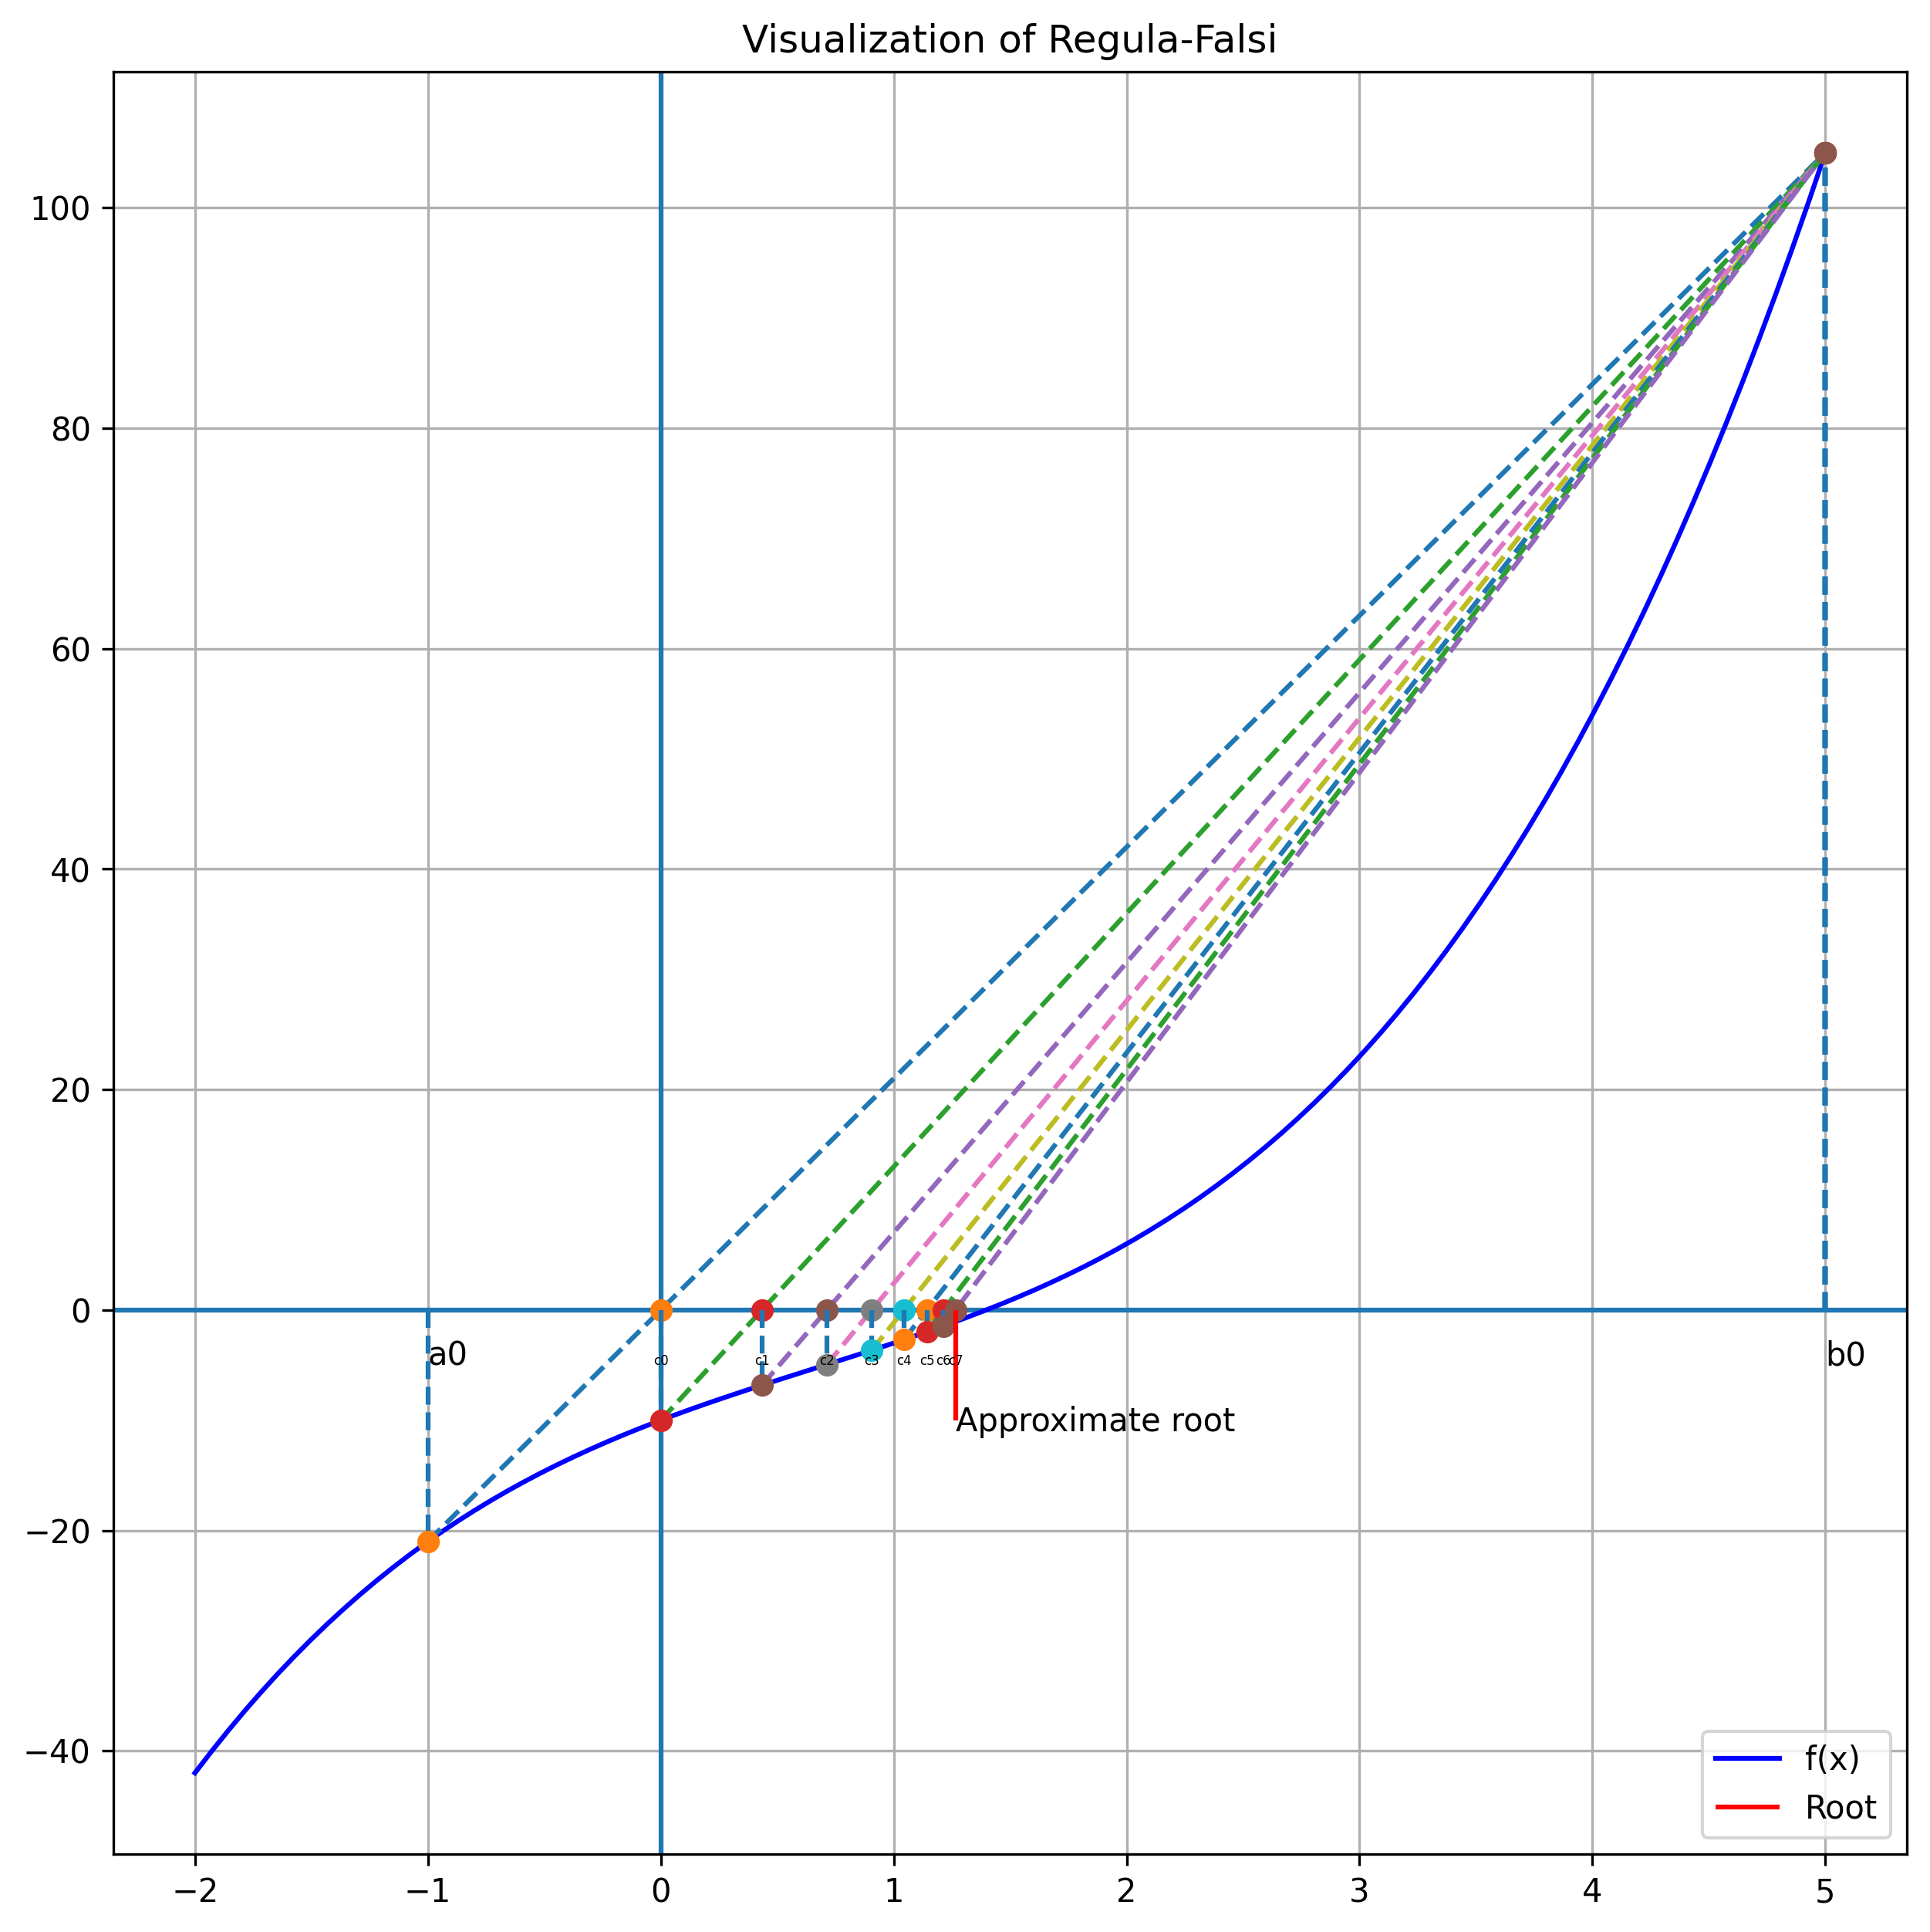

In [84]:
x= np.linspace(-2, 5, 100)
fig, ax= plt.subplots(figsize= (10,10), dpi=300)
ax.axhline(0,0, 1)
ax.axvline(0, 0,1)
plt.grid(True)
plt.plot(x,f(x),'b-', label='f(x)')
root, a, c, b= RegulaFalsi(f, -1, 5)
plt.text(a[0],-5, 'a0')
plt.text(b[0],-5,'b0')
for i in range(len(a)):
    #vertical lines...
    ax.vlines([a[i], b[i]], [0,0], [f(a[i]), f(b[i])], ls='--')
    #secant lines...
    plt.plot([a[i], b[i]], [f(a[i]), f(b[i])],'--')
    plt.plot([a[i], c[i], b[i]], [f(a[i]), 0, f(b[i])], 'o')
    #point labels...
    plt.text(c[i], -5, f'c{i}', horizontalalignment='center', fontsize=4)
plt.vlines(root, 0, -10, colors='red', ls='-', label='Root')
plt.text(root, -11, 'Approximate root')
plt.title("Visualization of Regula-Falsi")
plt.legend(loc='lower right')
plt.show()


##### You can zoom in and see for yourself how the x-intercepts of the secants change over each iteration. And with each iteration, the x-intercepts inch closer and closer to the true root